In [2]:
import torch
import numpy as np

pre_list, gt_list, label_list = [], [], []

for i in range(4):
    batch = torch.load('./0_{}_rank_point.pt'.format(i))
    pre_list.append(batch['pred_val'].cpu())
    gt_list.append(batch['rank'].cpu())
    label_list.append(batch['label'].cpu())

all_pre = torch.cat(pre_list, dim=0).squeeze(dim=-1)
all_gt = torch.cat(gt_list, dim=0)
all_lable = torch.cat(label_list, dim=0)

_, label = torch.topk(all_lable, k=1, dim=1)
label = label.squeeze(dim=1)

samples_list = []
for pred_value, gt_rank, tier_lable in zip(all_pre, all_gt, label):
    sample = (pred_value.numpy(), gt_rank.numpy(), tier_lable.numpy())
    samples_list.append(sample)

sorted_by_pred_list = sorted(samples_list, key=lambda x: x[0], reverse=True)

ranked_sorted_by_pred_list = []
for pred_rank, sample in enumerate(sorted_by_pred_list):
    (pred_val, gt_rank, tier_label) = sample
    sample2 = (pred_val, gt_rank, tier_label, pred_rank + 1)
    ranked_sorted_by_pred_list.append(sample2)

sorted_by_gtrank_list = sorted(ranked_sorted_by_pred_list, key=lambda x: x[1])

ranked_sorted_by_gtrank_list=[]
for gt_ranked_rank, sample in enumerate(sorted_by_gtrank_list):
    (pred_val, gt_rank, tier_label, pred_rank) = sample
    add_item1 = (pred_val, gt_rank, tier_label, pred_rank, gt_ranked_rank + 1)
    ranked_sorted_by_gtrank_list.append(add_item1)

a = np.zeros((1024, 3), int)
for i, it in enumerate(ranked_sorted_by_gtrank_list):
    a[i, 0] = it[3] # pred value
    a[i, 1] = it[4] # gt_rank
    a[i, 2] = it[2] # tier_label

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


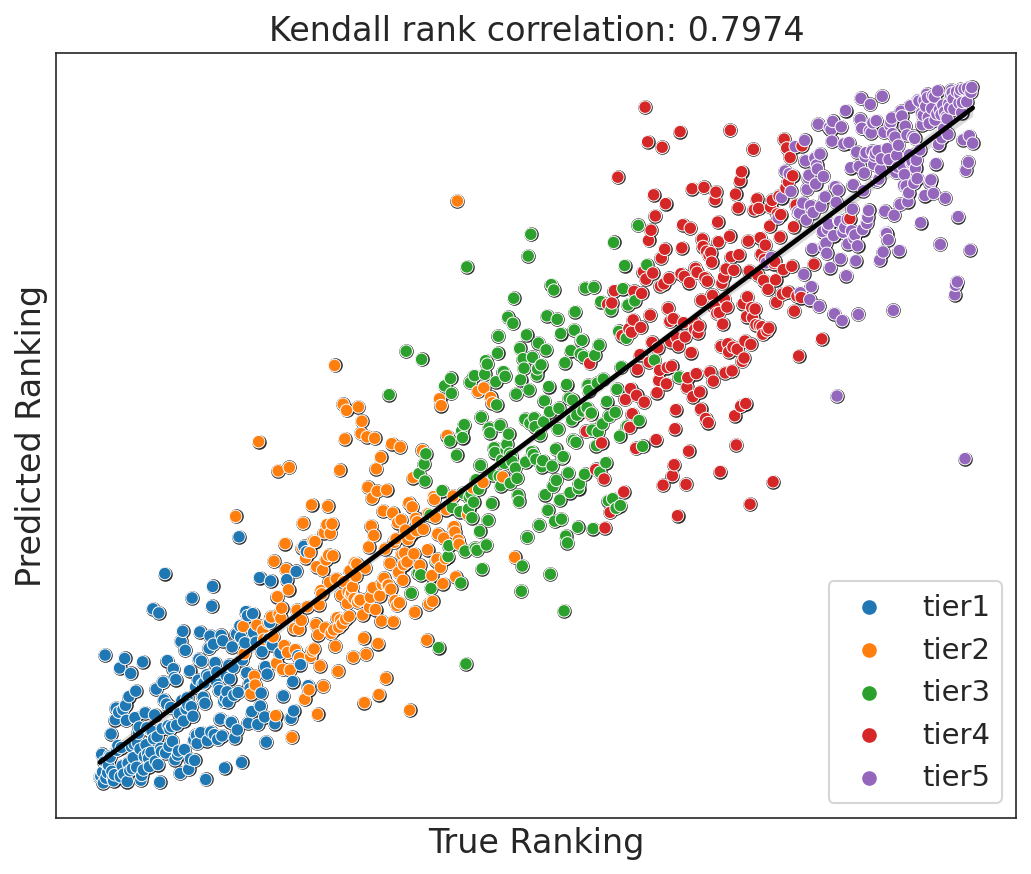

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")  
fig = plt.figure(num=1, figsize=(8,6), dpi=150)

ax1 = fig.add_subplot()
ax1.set_title('Kendall rank correlation: 0.7974', fontsize=16)
ax1 = sns.regplot(x=a[:,1], y=a[:,0], color = '#000000')
ax1 = sns.scatterplot(x=a[:,1], y=a[:,0], hue=a[:,2], palette='tab10')

# x=np.arange(0,1024)
# y =1*x
# ax1.plot(x, y, linewidth=2.5, color = '#000000', alpha = 0.7)


ax1.axes.xaxis.set_ticks([])
ax1.axes.yaxis.set_ticks([])

handles, labels = ax1.get_legend_handles_labels()
labels = ['tier1', 'tier2', 'tier3', 'tier4', 'tier5']
plt.legend(loc=4, fontsize=14, ncol=1, handles =handles, labels=labels)
plt.xlabel('True Ranking', fontsize=16)
plt.ylabel('Predicted Ranking',fontsize=16)
plt.subplots_adjust(bottom=0.1,left = 0.15,right=0.95,top=0.95)

plt.savefig('Kendaltau.eps',format='eps',dpi=150)
plt.show()

In [9]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


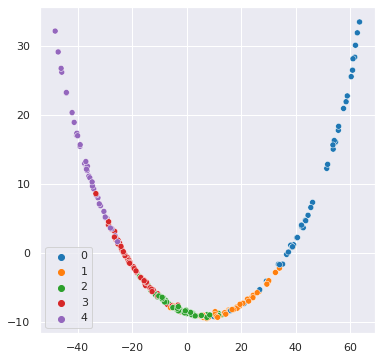

In [12]:
dic =torch.load('./34_feature.pt')
enc_output = dic['enc_output']
pred = dic['output']
target = dic['target']

_, index = torch.topk(target, k=1, dim=1)
target = index.squeeze().cpu().numpy()

enc_output = enc_output.view(enc_output.size(0),-1).cpu().numpy()

tsne = TSNE(n_components=2, learning_rate=100).fit_transform(enc_output)
pca = PCA().fit_transform(enc_output)
sns.set(rc={'figure.figsize':(6,6)})
# pla = sns.color_palette("tab10")
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=target, palette='tab10')
plt.show()

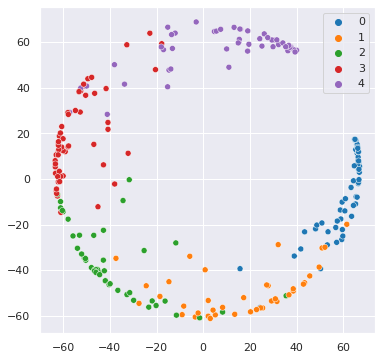

In [13]:
dic =torch.load('./34_feature_true.pt')
enc_output = dic['enc_output']
pred = dic['output']
target = dic['target']

_, index = torch.topk(target, k=1, dim=1)
target = index.squeeze().cpu().numpy()

enc_output = enc_output.view(enc_output.size(0),-1).cpu().numpy()

tsne = TSNE(n_components=2, learning_rate=100).fit_transform(enc_output)
pca = PCA().fit_transform(enc_output)

sns.set(rc={'figure.figsize':(6,6)})
# pla = sns.color_palette("tab10")
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=target, palette='tab10')
plt.show()